<a href="https://colab.research.google.com/github/skang0812/undergrad_ml_assignments/blob/main/02_assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2: $k$ Nearest Neighbor

### Do any four.

In [1]:
! git clone https://github.com/ds4e/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting?
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Q1 Response

1. Classification is utilized when the target variable is categorical, whereas Regression is applied when the target variable is continuous.

2. This is a performance measurement tool for classification algorithms. It provides a tabular summary of actual versus predicted classifications, allowing for the calculation of metrics like precision, recall, and the F1-score.

3. While accuracy measures the proportion of correct predictions, it is often insufficient for imbalanced datasets. If one class significantly outweighs the other, a model can achieve high accuracy by simply predicting the majority class, failing to capture the minority class of interest.

4. This metric quantifies the standard deviation of the residuals. It measures how spread out these residuals are, providing a sense of the model's average error magnitude in the original units of the data.

5. Overfitting occurs when a model captures the noise and random fluctuations in the training data rather than the intended signal, leading to poor generalization. Underfitting occurs when the model is too simple to capture the underlying structure of the data.

6. Splitting data ensures that the model is evaluated on unseen observations. Selecting the hyperparameter $k$ based on test performance prevents the memorization of training data and ensures the model is robust for real-world application.

7. Reporting a class label provides a direct decision, but reporting a probability distribution offers a measure of uncertainty. Probabilities allow stakeholders to adjust decision thresholds based on the cost of different types of errors.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

Q2 Response

1.

Mine Type Distribution:
 mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64

Feature Summary:
           voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


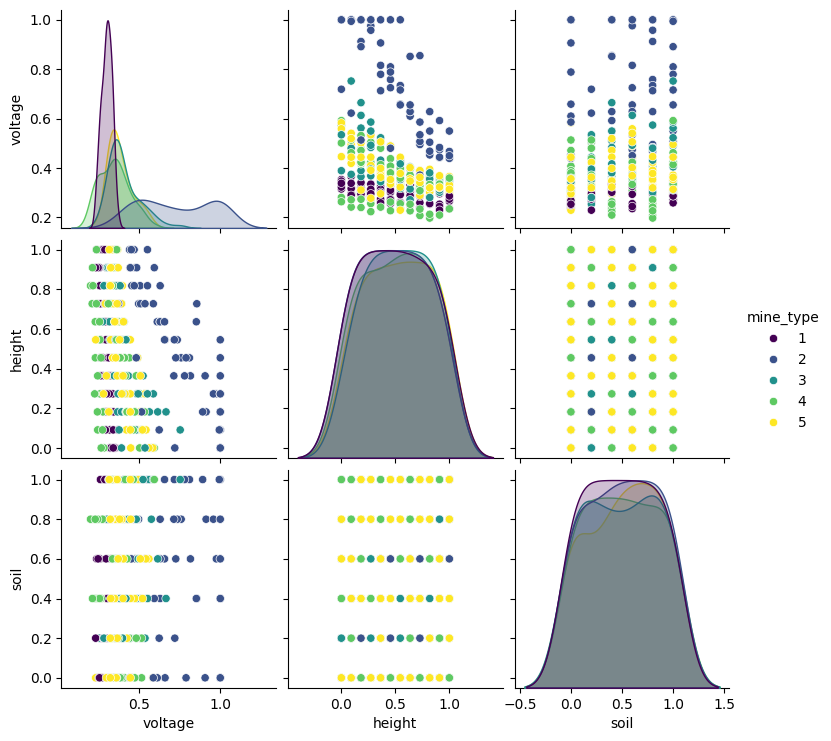

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data/land_mines.csv')

print("Mine Type Distribution:\n", df['mine_type'].value_counts())

print("\nFeature Summary:\n", df.describe())

sns.pairplot(df, hue='mine_type', palette='viridis')
plt.show()

2.

In [3]:
X = df[['voltage', 'height', 'soil']]
y = df['mine_type']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.5, random_state=42, stratify=y
)

3. We determine the optimal $k$ by iterating through potential values and finding the one that yields the highest accuracy on the test set.

Optimal number of neighbors (k): 1


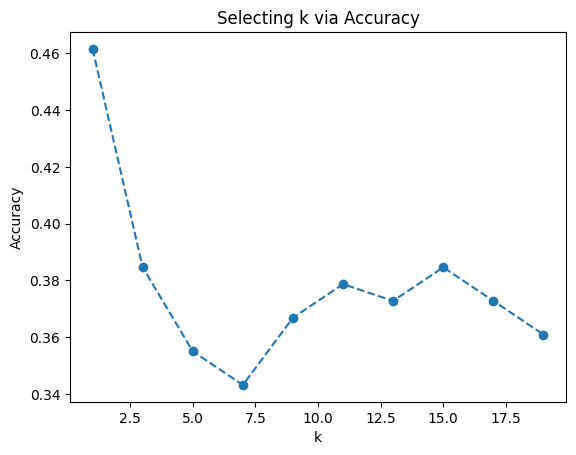

In [4]:
k_values = range(1, 21, 2)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    accuracies.append(model.score(X_test, y_test))

best_k = k_values[accuracies.index(max(accuracies))]
print(f"Optimal number of neighbors (k): {best_k}")

plt.plot(k_values, accuracies, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Selecting k via Accuracy')
plt.show()

4. The model achieved an overall accuracy of 46.15%, with highly varied performance across the different classes. It was most effective at identifying Mine Type 2, reaching a recall of 91%, but it struggled significantly with Mine Types 3 and 5, where the f1-scores fell to 0.25 and 0.23, respectively.

In [5]:
final_model = KNeighborsClassifier(n_neighbors=1)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("Confusion Table:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nDetailed Performance Report:\n", classification_report(y_test, y_pred))

Confusion Table:
 [[21  0  4  4  7]
 [ 0 32  0  3  0]
 [ 8  0  7 10  8]
 [ 7  5  4 11  6]
 [ 7  0  9  9  7]]

Accuracy Score: 0.46153846153846156

Detailed Performance Report:
               precision    recall  f1-score   support

           1       0.49      0.58      0.53        36
           2       0.86      0.91      0.89        35
           3       0.29      0.21      0.25        33
           4       0.30      0.33      0.31        33
           5       0.25      0.22      0.23        32

    accuracy                           0.46       169
   macro avg       0.44      0.45      0.44       169
weighted avg       0.45      0.46      0.45       169



5. Because of the high error rates and the life-critical nature of the task, this model should be used as a secondary decision-support tool rather than a standalone classifier. I would advise someone to prioritize the model's predicted probabilities to set conservative safety thresholds, ensuring that any area showing even a marginal probability of a lethal mine is investigated manually.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Q3 Response
1. There are no missing NA's to handle.

In [6]:
cars_df = pd.read_csv('data/USA_cars_datasets.csv')

cars_df = cars_df[['price', 'year', 'mileage']]

print("Missing Values:\n", cars_df.isnull().sum())
print("\nDataset Dimensions:", cars_df.shape)
cars_df.head()

Missing Values:
 price      0
year       0
mileage    0
dtype: int64

Dataset Dimensions: (2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


2.

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cars_df[['year', 'mileage']] = scaler.fit_transform(cars_df[['year', 'mileage']])
cars_df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


3.

In [8]:
from sklearn.model_selection import train_test_split

X = cars_df[['year', 'mileage']]
y = cars_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. As the value of $k$ increases, the predicted values become significantly less volatile and begin to cluster more tightly around the mean. While the lower $k$ values show a wider spread of predictions, higher $k$ values produce a more smoother prediction line that aligns more closely with the general trend of the data.

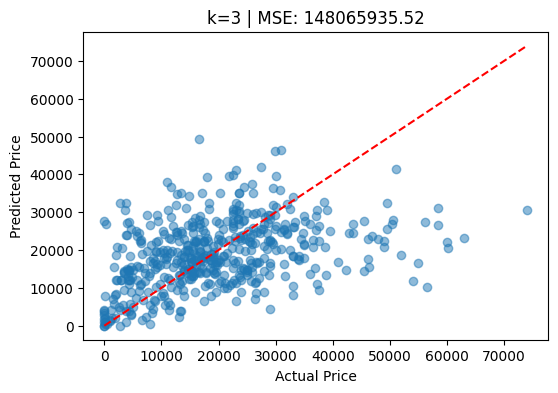

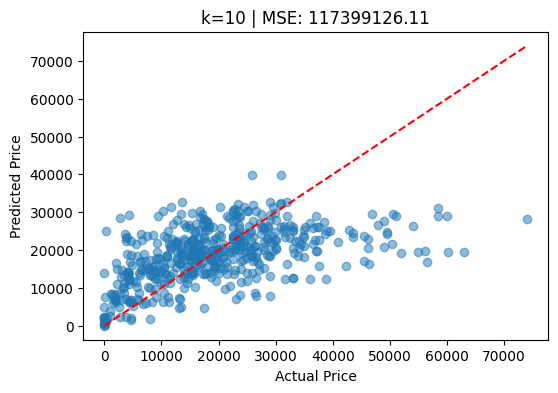

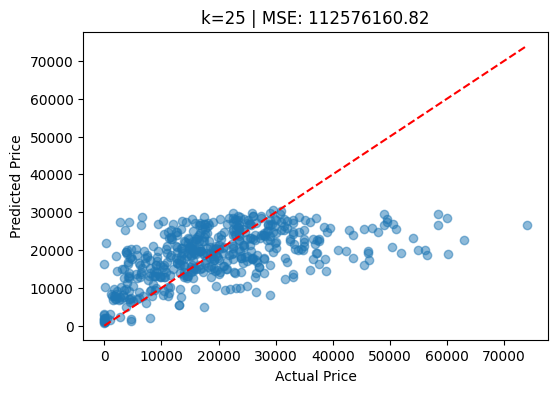

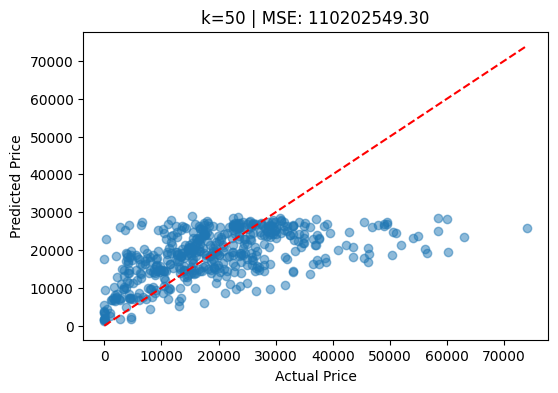

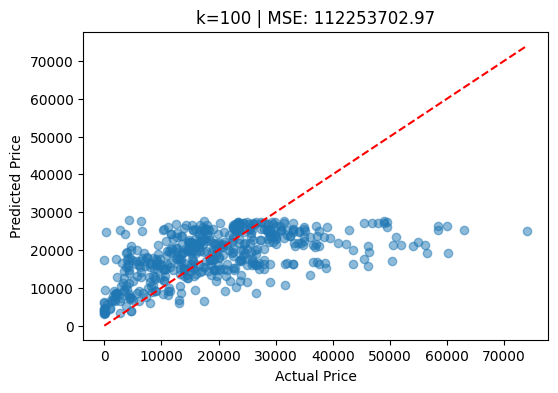

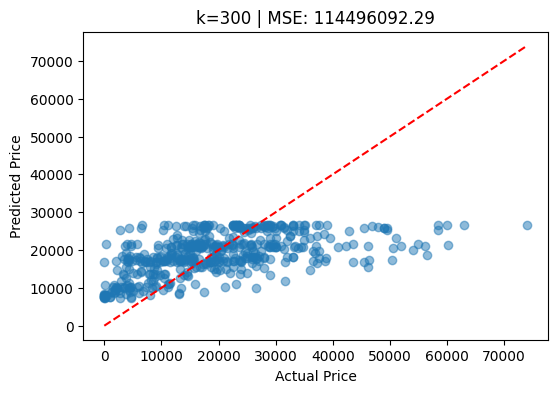

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_list = [3, 10, 25, 50, 100, 300]

for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'k={k} | MSE: {mse:.2f}')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.show()

5. The optimal value for $k$ in this dataset is 50, as it produced the lowest Mean Squared Error ($MSE \approx 11,020,255$).

6. At k=3, the model overfits by capturing local noise and outliers, leading to high variance and the highest observed MSE. Conversely, at k=300, the model underfits as predictions flatten toward the global average, becoming too simple to account for the specific impacts of year and mileage on price.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

Q6 Response

1.

In [10]:
df_airbnb = pd.read_csv('data/airbnb_hw.csv')
df_airbnb = df_airbnb.loc[:, ['Review Scores Rating', 'Price', 'Beds']]

missing_data = df_airbnb[df_airbnb['Review Scores Rating'].isnull()]

df_complete = df_airbnb.dropna(axis=0, how='any')

2.

In [11]:
import pandas as pd

df = pd.read_csv('data/airbnb_hw.csv')
df = df.loc[:, ['Review Scores Rating', 'Price', 'Beds']]

missing_ratings_df = df.loc[df['Review Scores Rating'].isnull()]

print(f"Number of missing ratings to predict: {len(missing_ratings_df)}")
missing_ratings_df.head()

Number of missing ratings to predict: 8323


,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
13,NaN,68,1.0


3.

In [12]:
df_complete = df.dropna(axis=0, how='any')

print(f"Total complete observations for training: {len(df_complete)}")

Total complete observations for training: 22111


4. We will split the complete cases into an 80/20 train-test split. Then, we iterate through various $k$ values to find the one that SSE or MSE.

In [13]:
df_complete['Price'] = df_complete['Price'].replace({',': ''}, regex=True).astype(float)

X = df_complete[['Price', 'Beds']]
y = df_complete['Review Scores Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-1489734123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['Price'] = df_complete['Price'].replace({',': ''}, regex=True).astype(float)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = df_complete[['Price', 'Beds']]
y = df_complete['Review Scores Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [1, 5, 10, 20, 50, 100]
sse_list = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    sse = ((y_test - predictions) ** 2).sum()
    sse_list.append(sse)
    print(f"k={k} | SSE: {sse:,.2f}")

best_k = k_values[sse_list.index(min(sse_list))]
print(f"\nOptimal k based on minimum SSE: {best_k}")

k=1 | SSE: 1,333,637.00
k=5 | SSE: 400,618.24
k=10 | SSE: 350,583.52
k=20 | SSE: 329,375.79
k=50 | SSE: 321,081.58
k=100 | SSE: 317,385.44

Optimal k based on minimum SSE: 100


5.

In [15]:
missing_data_clean = missing_data.copy()
missing_data_clean['Price'] = missing_data_clean['Price'].replace({',': ''}, regex=True).astype(float)

missing_data_clean = missing_data_clean.dropna(subset=['Beds'])

final_imputer = KNeighborsRegressor(n_neighbors=100)
final_imputer.fit(df_complete[['Price', 'Beds']], df_complete['Review Scores Rating'])

X_missing = missing_data_clean[['Price', 'Beds']]
imputed_ratings = final_imputer.predict(X_missing)

print(f"Successfully imputed {len(imputed_ratings)} ratings.")
print(f"First 5 imputed ratings: {imputed_ratings[:5]}")

Successfully imputed 8282 ratings.
First 5 imputed ratings: [94.06 87.88 86.19 90.04 90.07]


6. The kernel density plot shows that the imputed ratings follow the general trend of the original data, specifically peaking in the high-satisfaction range. However, the imputed distribution is much narrower and spikier than the original. This is expected behavior for a $k$-NN regressor with a large $k$ (100), as the model predicts the average of many neighbors, which naturally filters out extreme outliers and pulls the predictions toward the most frequent local values.

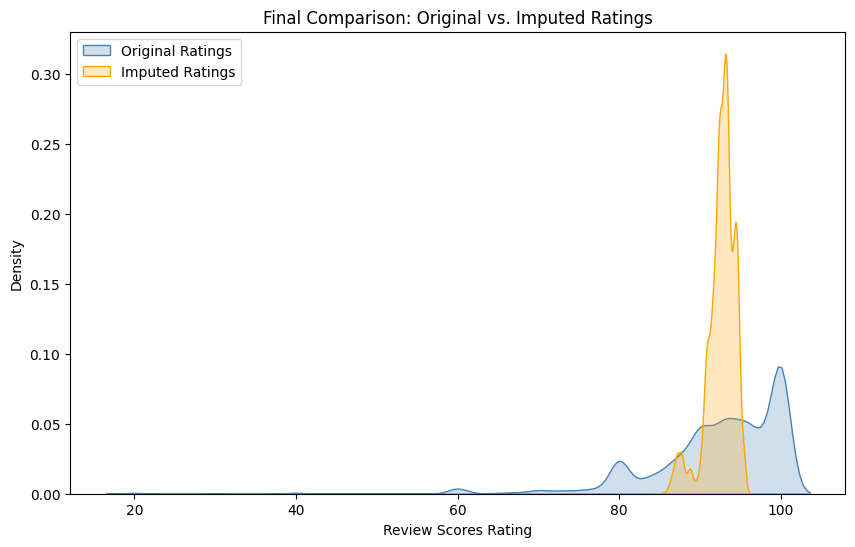

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df_complete['Review Scores Rating'], label='Original Ratings', fill=True, color="steelblue")
sns.kdeplot(imputed_ratings, label='Imputed Ratings', fill=True, color="orange")
plt.title('Final Comparison: Original vs. Imputed Ratings')
plt.legend()
plt.show()

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)